In [4]:
import mglearn
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [6]:
cancer= load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [9]:
len(x_train)

426

In [10]:
len(y_train)

426

In [11]:
len(x_test)

143

In [13]:
len(y_test)

143

In [15]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [16]:
print('훈련 세트 정확도', mlp.score(x_train,y_train))
print('테스트 세트 정확도', mlp.score(x_test,y_test))

훈련 세트 정확도 0.9272300469483568
테스트 세트 정확도 0.9300699300699301


##### MLP 정확도 꽤 높다
- 정확도를 높일 수 있는 방법?
- 평균 0, 분산 1이 가지도록 데이터를 변형해주면 성능이 좋아질 수 있다.
- Standardscaler : 데이터가 평군이 0, 분산 1이 되도록 스케일링을 진행

In [20]:
from sklearn.preprocessing import StandardScaler
# 스케일러 정의
# 스케일러 학습
# 데이터 변환
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

#### Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

max_iter: 값을 늘려주는게 좋다

In [24]:
# score : accuracy
print('훈련 세트 정확도 :', mlp.score(x_train_scaled,y_train))
print('테스트 세트 정확도 :', mlp.score(x_test_scaled,y_test))

훈련 세트 정확도 : 0.9906103286384976
테스트 세트 정확도 : 0.965034965034965


In [28]:
mlp = MLPClassifier(max_iter=1000, random_state=0, alpha=1)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [29]:
print('훈련 세트 정확도 :', mlp.score(x_train_scaled,y_train))
print('테스트 세트 정확도 :', mlp.score(x_test_scaled,y_test))

훈련 세트 정확도 : 0.9882629107981221
테스트 세트 정확도 : 0.972027972027972


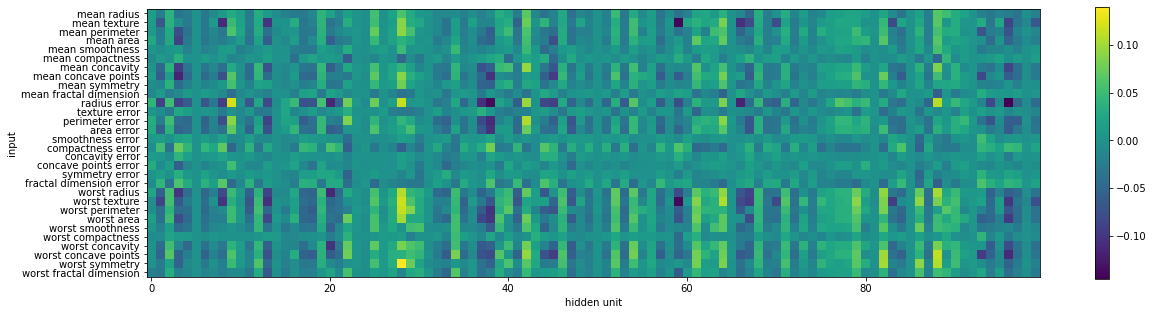

In [32]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input')
plt.colorbar()